## Cargar las librerias necesarias.

In [1]:
# Importar librerías necesarias
import numpy as np
import keras
import matplotlib.pyplot as plt
import keras.utils as np_utils
# Importar el optimizador a usar
from keras.optimizers import SGD
# Importtar el conjunto de datos
from keras.datasets import cifar100
# Importar modelos y capas que se van a usar
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## Cargar y modificar el conjunto de datos.

In [2]:
# Number of samples processed before the model is updated.
batch_size = 128
# Ammount of classes
num_classes = 25
# Number of times that the learning algorithm will work through the entire training dataset.
epochs = 12
# input image dimensions
img_rows, img_cols = 32, 32
# input shape
input_shape = (img_rows, img_cols, 3)

A esta función sólo se le llama una vez. Devuelve 4 vectores conteniendo, por este orden, las imágenes de entrenamiento, las clases de las imagenes de enternamiento, las imágenes del conjunto de test y las clases del conjunto de test.
Cifar100 tiene imágenes de tamaño (32, 32, 3). Nos vamos a quedar con las imágenes de 25 de las clases.

In [3]:
def cargarImagenes():
    
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    train_idx = np.isin(y_train, np.arange(25))
    train_idx = np.reshape(train_idx, -1)
    x_train = x_train[train_idx]
    y_train = y_train[train_idx]
    test_idx = np.isin(y_test, np.arange(25))
    test_idx = np.reshape(test_idx, -1)
    x_test = x_test[test_idx]
    y_test = y_test[test_idx]
    
    '''
    Transformamos los vectores de clases en matrices.
    Cada componente se convierte en un vector de ceros con un uno en la componente correspondiente a la clase a la que pertenece la imagen.
    Este paso es necesario para la clasificación multiclase en keras.
    '''
    
    y_train = np_utils.to_categorical(y_train, 25)
    y_test = np_utils.to_categorical(y_test, 25)
    
    return x_train, y_train, x_test, y_test

## Obtener el accuracy en el conjunto de test

Esta función devuelve el accuracy de un modelo, definido como el porcentaje de etiquetas bien predichas frente al total de etiquetas. Como parámetros es necesario pasarle el vector de etiquetas verdaderas y el vector de etiquedas predichas, en el formato de keras (matrices donde cada etiqueta ocupa una fila, con un 1 en laposición de la clase a la que pertenece y 0 en las demás).

In [4]:
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmas(preds, axis = 1)
    
    return sum(labels==preds)/len(labels)

## Función pintar la pérdida y el accuracy en train y validación.

Esta función pinta dos gráficas, una con la evolución de la función de pérdida en el conjunto de train y en el de validación, y otra con la evolución del accuracy en el conjunto de train y el de validación.
es necesario pasarle como parámetro el historial del entrenamiento del modelo (lo devuelven las funciones fit() y fit_generator()).

In [20]:
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()
    
    hcc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy', 'Validation accuracy'])

## Definición del modelo BaseNet

In [6]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5,5), 
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 28)        2128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        7010      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                12550     
_________________________________________________________________
dense_2 (Dense)              (None, 25)               

### Definicion del optimizador y compilacion del modelo

Configures the model for training.

+ **optimizer:** String (name of optimizer) or optimizer instance.
+ **loss:** String (name of objective function) or objective function or Loss instance.
+ **metrics:** List of metrics to be evaluated by the model during training and testing.

In [7]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

Una vez tenemos el modelo base, y antes de entrenar, vamos a guardar los pesos aleatorios con los que empieza la red, para poder reestablecerlos después y comparar resultados entre no usar mejoras y sí usarlas.

In [8]:
weights = model.get_weights()

## Entrenamiento del modelo

Trains the model for a fixed number of epochs (iterations on a dataset).

In [9]:
x_train, y_train, x_test, y_test = cargarImagenes()
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 12500 samples, validate on 2500 samples
Epoch 1/12
12500/12500 [==============================] - 16s 1ms/step - loss: 3.1301 - accuracy: 0.0866 - val_loss: 2.9670 - val_accuracy: 0.1280
Epoch 2/12
12500/12500 [==============================] - 16s 1ms/step - loss: 2.8162 - accuracy: 0.1856 - val_loss: 2.8451 - val_accuracy: 0.1732
Epoch 3/12
12500/12500 [==============================] - 17s 1ms/step - loss: 2.5784 - accuracy: 0.2533 - val_loss: 2.4335 - val_accuracy: 0.3016
Epoch 4/12
12500/12500 [==============================] - 17s 1ms/step - loss: 2.4206 - accuracy: 0.2944 - val_loss: 2.4247 - val_accuracy: 0.3020
Epoch 5/12
12500/12500 [==============================] - 19s 2ms/step - loss: 2.3055 - accuracy: 0.3300 - val_loss: 2.3372 - val_accuracy: 0.3180
Epoch 6/12
12500/12500 [==============================] - 19s 2ms/step - loss: 2.2296 - accuracy: 0.3447 - val_loss: 2.2645 - val_accuracy: 0.3444
Epoch 7/12
12500/12500 [==============================] - 16s 1ms/ste

## Predicción sobre el conjunto de test.

Test loss: 2.091139558029175
Test accuracy: 0.3887999951839447


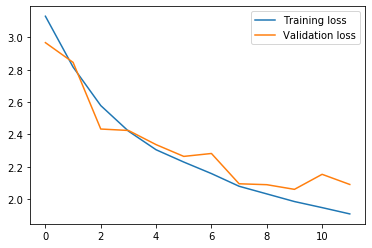

NameError: name 'acc' is not defined

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
mostrarEvolucion(history)

## Mejora del modelo

Tanto la normalización de los datos como el data augmentation debe hacerse con la clase ImageDataGenerator.
Se recomienda ir entrenando con cada paso para comprobar en qué grado mejora cada uno de ellos.